# Example Ion-by-Ion Network
Ionization, recombination, photo-ionization give rises to transitions between ionization states. Photo-heating, and ion-by-ion cooling modifies the thermal energy of the system. In the above we demonstrated that it can be accounted for by adding each one of them by hand. This can grow out of hand as the number of ionization state is enormous. Dengo provide a more straightforward implementation with `dengo.ion_by_ion setup_ionization`.

In [1]:
import os

os.environ["XUVTOP"] = "/home/kwoksun2/data/dengo-merge/CHIANTI"
import ChiantiPy.core as ch

 ChiantiPy version 0.12.0 
 found PyQt5 widgets
 using PyQt5 widgets


/home/kwoksun2/anaconda3/lib/python3.8/site-packages/ChiantiPy-0.12.0-py3.8.egg/ChiantiPy/tools/data.py:71: UserWarning: klgfb files are not present: 
  it will not be possible to use the freeBound continuum method
  warnings.warn('klgfb files are not present: \n  it will not be possible to use the freeBound continuum method')
/home/kwoksun2/anaconda3/lib/python3.8/site-packages/ChiantiPy-0.12.0-py3.8.egg/ChiantiPy/core/IpyMspectrum.py:9: UserWarning: ipyparallel not found. You won't be able to use the ipymspectrum module
  warnings.warn("ipyparallel not found. You won't be able to use the ipymspectrum module")


In [2]:
from dengo.chemical_network import (
    ChemicalNetwork,
    reaction_registry,
    cooling_registry,
    species_registry,
)
from dengo.ion_by_ion import setup_ionization

setup_ionization("H", photo_background="HM12")
setup_ionization("He", photo_background="HM12")
setup_ionization("C", photo_background="HM12")
setup_ionization("N", photo_background="HM12")
setup_ionization("O", photo_background="HM12");

In [3]:
reaction_registry

{'H_1_i': H_1_i : 1*H_1 + 1*de => 1*H_2 + 2*de,
 'H_1_pi': H_1_pi : 1*H_1 => 1*H_2 + 1*de,
 'H_2_r': H_2_r : 1*H_2 + 1*de => 1*H_1,
 'He_1_i': He_1_i : 1*He_1 + 1*de => 1*He_2 + 2*de,
 'He_1_pi': He_1_pi : 1*He_1 => 1*He_2 + 1*de,
 'He_2_i': He_2_i : 1*He_2 + 1*de => 1*He_3 + 2*de,
 'He_2_r': He_2_r : 1*He_2 + 1*de => 1*He_1,
 'He_2_pi': He_2_pi : 1*He_2 => 1*He_3 + 1*de,
 'He_3_r': He_3_r : 1*He_3 + 1*de => 1*He_2,
 'C_1_i': C_1_i : 1*C_1 + 1*de => 1*C_2 + 2*de,
 'C_1_pi': C_1_pi : 1*C_1 => 1*C_2 + 1*de,
 'C_2_i': C_2_i : 1*C_2 + 1*de => 1*C_3 + 2*de,
 'C_2_r': C_2_r : 1*C_2 + 1*de => 1*C_1,
 'C_2_pi': C_2_pi : 1*C_2 => 1*C_3 + 1*de,
 'C_3_i': C_3_i : 1*C_3 + 1*de => 1*C_4 + 2*de,
 'C_3_r': C_3_r : 1*C_3 + 1*de => 1*C_2,
 'C_3_pi': C_3_pi : 1*C_3 => 1*C_4 + 1*de,
 'C_4_i': C_4_i : 1*C_4 + 1*de => 1*C_5 + 2*de,
 'C_4_r': C_4_r : 1*C_4 + 1*de => 1*C_3,
 'C_4_pi': C_4_pi : 1*C_4 => 1*C_5 + 1*de,
 'C_5_i': C_5_i : 1*C_5 + 1*de => 1*C_6 + 2*de,
 'C_5_r': C_5_r : 1*C_5 + 1*de => 1*C_4,
 'C_

In [4]:
cooling_registry

{'H_1_c': <dengo.reaction_classes.CoolingAction at 0x7feda154e490>,
 'H_1_ph': <dengo.reaction_classes.CoolingAction at 0x7feda154e5b0>,
 'H_2_c': <dengo.reaction_classes.CoolingAction at 0x7feda154e7c0>,
 'He_1_c': <dengo.reaction_classes.CoolingAction at 0x7feda154ea00>,
 'He_1_ph': <dengo.reaction_classes.CoolingAction at 0x7feda154ebb0>,
 'He_2_c': <dengo.reaction_classes.CoolingAction at 0x7feda154ed90>,
 'He_2_ph': <dengo.reaction_classes.CoolingAction at 0x7feda154ef40>,
 'He_3_c': <dengo.reaction_classes.CoolingAction at 0x7feda155b100>,
 'C_1_c': <dengo.reaction_classes.CoolingAction at 0x7feda155b4c0>,
 'C_1_ph': <dengo.reaction_classes.CoolingAction at 0x7feda155b670>,
 'C_2_c': <dengo.reaction_classes.CoolingAction at 0x7feda155b850>,
 'C_2_ph': <dengo.reaction_classes.CoolingAction at 0x7feda155ba00>,
 'C_3_c': <dengo.reaction_classes.CoolingAction at 0x7feda155bbe0>,
 'C_3_ph': <dengo.reaction_classes.CoolingAction at 0x7feda155bd90>,
 'C_4_c': <dengo.reaction_classes.Coo

In [5]:
ion_by_ion = ChemicalNetwork()

for r in reaction_registry:
    ion_by_ion.add_reaction(r)
for c in cooling_registry:
    ion_by_ion.add_cooling(c)

# This defines the temperature range for the rate tables
ion_by_ion.init_temperature((1e0, 1e12))

# This defines the redsfhit range for the rate tables
ion_by_ion.init_redshift((0.000001, 9.0))

Adding reaction: H_1_i : 1*H_1 + 1*de => 1*H_2 + 2*de
Adding reaction: H_1_pi : 1*H_1 => 1*H_2 + 1*de
Adding reaction: H_2_r : 1*H_2 + 1*de => 1*H_1
Adding reaction: He_1_i : 1*He_1 + 1*de => 1*He_2 + 2*de
Adding reaction: He_1_pi : 1*He_1 => 1*He_2 + 1*de
Adding reaction: He_2_i : 1*He_2 + 1*de => 1*He_3 + 2*de
Adding reaction: He_2_r : 1*He_2 + 1*de => 1*He_1
Adding reaction: He_2_pi : 1*He_2 => 1*He_3 + 1*de
Adding reaction: He_3_r : 1*He_3 + 1*de => 1*He_2
Adding reaction: C_1_i : 1*C_1 + 1*de => 1*C_2 + 2*de
Adding reaction: C_1_pi : 1*C_1 => 1*C_2 + 1*de
Adding reaction: C_2_i : 1*C_2 + 1*de => 1*C_3 + 2*de
Adding reaction: C_2_r : 1*C_2 + 1*de => 1*C_1
Adding reaction: C_2_pi : 1*C_2 => 1*C_3 + 1*de
Adding reaction: C_3_i : 1*C_3 + 1*de => 1*C_4 + 2*de
Adding reaction: C_3_r : 1*C_3 + 1*de => 1*C_2
Adding reaction: C_3_pi : 1*C_3 => 1*C_4 + 1*de
Adding reaction: C_4_i : 1*C_4 + 1*de => 1*C_5 + 2*de
Adding reaction: C_4_r : 1*C_4 + 1*de => 1*C_3
Adding reaction: C_4_pi : 1*C_4 =>

## Prepare a sample inital condition array
We can initialize the array to collisional ionizataion equilibrium at a high temperature, and observe how it changes as cooling kicks in. To this end we can employ `chianti` to help us with calculating ionizational equilibrium and multiply this with the solar abundance again avaiable from `chianti`.

In [6]:
# initialize temperature/ density
from dengo.chemistry_constants import kboltz, mh, tiny
import numpy as np

NCELLS = 1
density = 1.0  # per amu mass
temperature = np.ones(NCELLS) * 5e6
X = 1e-8
tiny = 1e-20

In [7]:
init_array = np.ones(NCELLS) * density
init_values = dict()

# set up initial temperatures values used to define ge
init_values["T"] = temperature

for s in sorted(ion_by_ion.required_species):
    if s.name not in ["ge", "de"]:
        ion_name = s.name.lower()
        ion = ch.ion(ion_name, temperature=init_values["T"])
        try:
            ion.ioneqOne()
        except:
            ion.ioneqOne()
        ion_frac = ion.IoneqOne

        # ion.Abundance is the elemental abundance relative to hydrogen
        init_values[s.name] = ion_frac * init_array * ion.Abundance

        # in case something is negative or super small:
        init_values[s.name][init_values[s.name] < tiny] = tiny

init_values["de"] = init_array * 0.0
init_values = ion_by_ion.convert_to_mass_density(init_values)

init_values["de"] = ion_by_ion.calculate_free_electrons(init_values)
init_values["density"] = ion_by_ion.calculate_total_density(init_values)
number_density = ion_by_ion.calculate_number_density(init_values)

# calculate ge (very crudely)
gamma = 5.0 / 3.0
init_values["ge"] = (temperature * number_density * kboltz) / (
    init_values["density"] * mh * (gamma - 1)
)

## Writing the templates from the `ChemicalNetwork`

In [10]:
# Write the initial conditions file
ion_by_ion.write_solver(
    "ion_by_ion",
    output_dir=".",
    init_values=init_values,
    solver_template="cv_omp/sundials_CVDls",
    ode_solver_source="initialize_cvode_solver.C",
)

/mnt/gv0/homes/kwoksun2/dengo-merge/dengo/../input/photoheating/c_ion_by_ion_photoheating_HM12.h5
/mnt/gv0/homes/kwoksun2/dengo-merge/dengo/../input/photoheating/c_ion_by_ion_photoheating_HM12.h5
/mnt/gv0/homes/kwoksun2/dengo-merge/dengo/../input/photoheating/c_ion_by_ion_photoheating_HM12.h5
/mnt/gv0/homes/kwoksun2/dengo-merge/dengo/../input/photoheating/c_ion_by_ion_photoheating_HM12.h5
/mnt/gv0/homes/kwoksun2/dengo-merge/dengo/../input/photoheating/c_ion_by_ion_photoheating_HM12.h5
/mnt/gv0/homes/kwoksun2/dengo-merge/dengo/../input/photoheating/c_ion_by_ion_photoheating_HM12.h5
/mnt/gv0/homes/kwoksun2/dengo-merge/dengo/../input/photoheating/h_ion_by_ion_photoheating_HM12.h5
/mnt/gv0/homes/kwoksun2/dengo-merge/dengo/../input/photoheating/he_ion_by_ion_photoheating_HM12.h5
/mnt/gv0/homes/kwoksun2/dengo-merge/dengo/../input/photoheating/he_ion_by_ion_photoheating_HM12.h5
/mnt/gv0/homes/kwoksun2/dengo-merge/dengo/../input/photoheating/n_ion_by_ion_photoheating_HM12.h5
/mnt/gv0/homes/kwo

## Importing `Cython` modules

In [11]:
import pyximport

pyximport.install(
    setup_args={"include_dirs": np.get_include()}, reload_support=True, inplace=True
)

ion_by_ion_solver_run = pyximport.load_module(
    "ion_by_ion_solver_run",
    "ion_by_ion_solver_run.pyx",
    build_inplace=True,
    pyxbuild_dir="_dengo_temp",
)

You have suitesparse!


/home/kwoksun2/anaconda3/lib/python3.8/site-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /mnt/gv0/homes/kwoksun2/dengo-merge/cookbook/topic_guides/ion_by_ion_solver_run.pxd
  tree = Parsing.p_module(s, pxd, full_module_name)
cc1plus: warning: command line option '-Wstrict-prototypes' is valid for C/ObjC but not for C++
cc1plus: warning: command line option '-Wstrict-prototypes' is valid for C/ObjC but not for C++
cc1plus: warning: command line option '-Wstrict-prototypes' is valid for C/ObjC but not for C++


## Integrate the system
We see that there is a sharp transition as temperature drops. Collionsal ionization equilibrium is no longer a good assumption, the ionization level changes drasically.

In [12]:
rv, rv_int = ion_by_ion_solver_run.run_ion_by_ion(
    init_values, tf=1e15, niter=10000, z=4.0, floor_value=1e-40, reltol=1e-6
)

Successful iteration[    0]: (1.000e+11) 1.000e+11 / 1.000e+15
End in 73 iterations: 1.00000e+15 / 1.00000e+15 (0.00000e+00)



[CVODE ERROR]  CVode
  At t = 1.99412e+12, mxstep steps taken before reaching tout.


[CVODE ERROR]  CVode
  At t = 2.77661e+11, mxstep steps taken before reaching tout.



Text(0, 0.5, 'Mass density/ m_amu ($cm^{-3}$)')

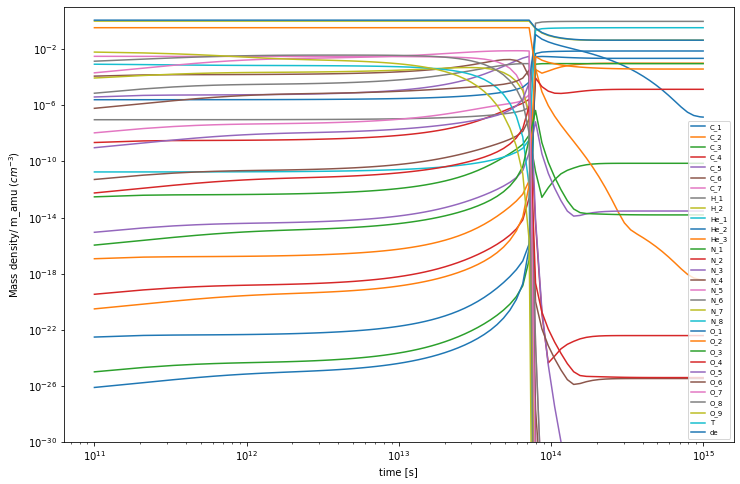

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

mask = rv_int["successful"]
for name in sorted(rv_int):
    if len(rv_int[name].shape) == 1:
        rv_int[name] = rv_int[name][mask]
    else:
        rv_int[name] = rv_int[name][0, mask]
skip = ("successful", "dt", "t", "ge")
for n, v in sorted(rv_int.items()):
    if n in skip:
        continue
    plt.loglog(rv_int["t"], v, label=n)

plt.ylim(density * 1e-30, density * 10)
plt.xlabel("time [s]")
plt.legend(loc="best", fontsize="x-small")
plt.ylabel(r"Mass density/ m_amu ($cm^{-3}$)")

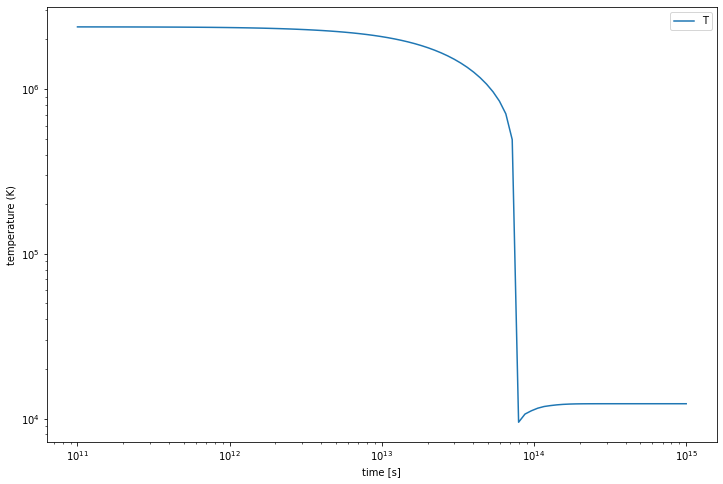

In [ ]:
plt.figure(figsize=(12, 8))
plt.loglog(rv_int["t"], rv_int["T"], label="T")
plt.xlabel("time [s]")
plt.ylabel("temperature (K)")
plt.legend()